<a href="https://colab.research.google.com/github/maschu09/mless/blob/main/time_series_forecasting/7_multi_model_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author Paul v. Werthern

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:

for model_name, (forecast_rel_path, y_true_rel_path) in forecast_group.items():
    forecast_path = os.path.join(base_dir, forecast_rel_path)
    y_true_path = os.path.join(base_dir, y_true_rel_path)

    forecast = np.load(forecast_path)
    y_true = np.load(y_true_path)

    print(f"{model_name}:{forecast.shape}")
    print(f"{model_name}:{y_true.shape}")



NameError: name 'forecast_group' is not defined

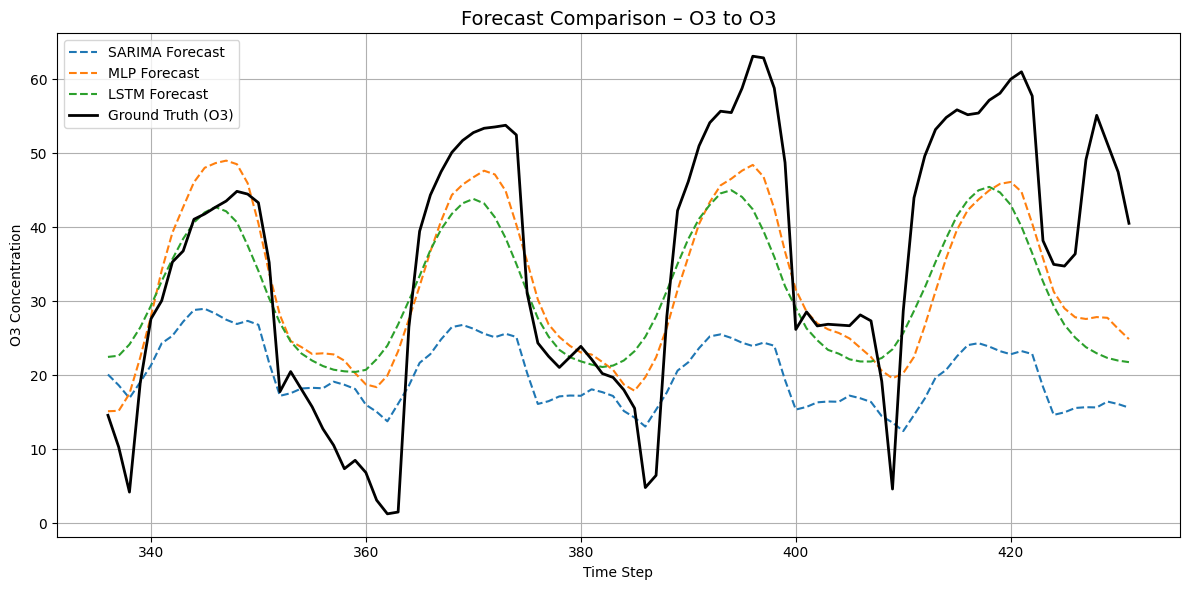

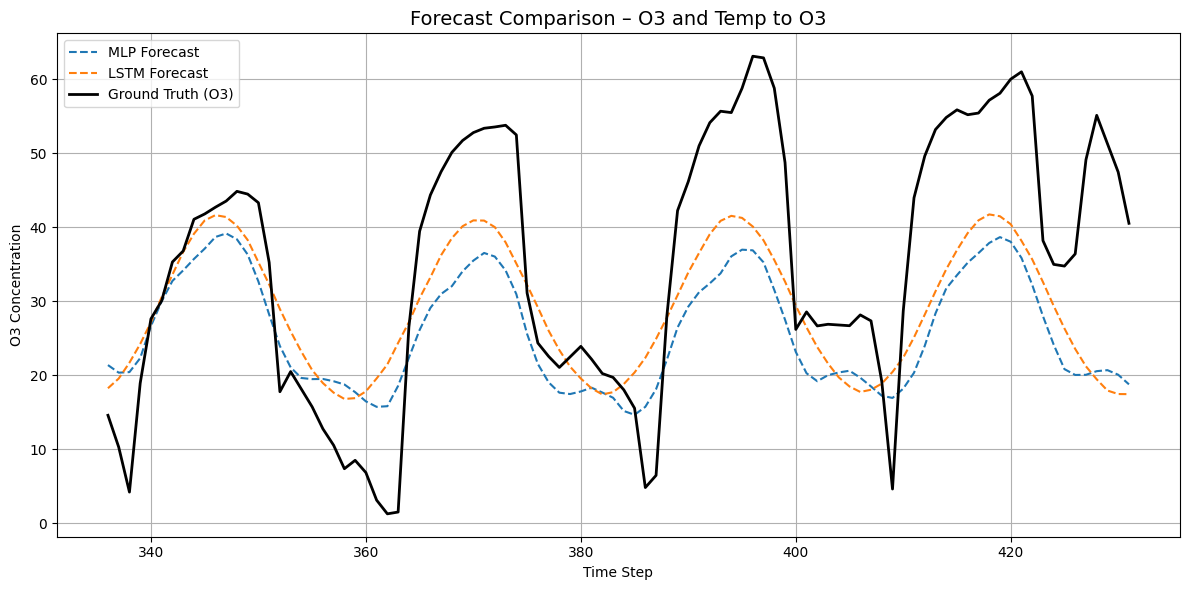

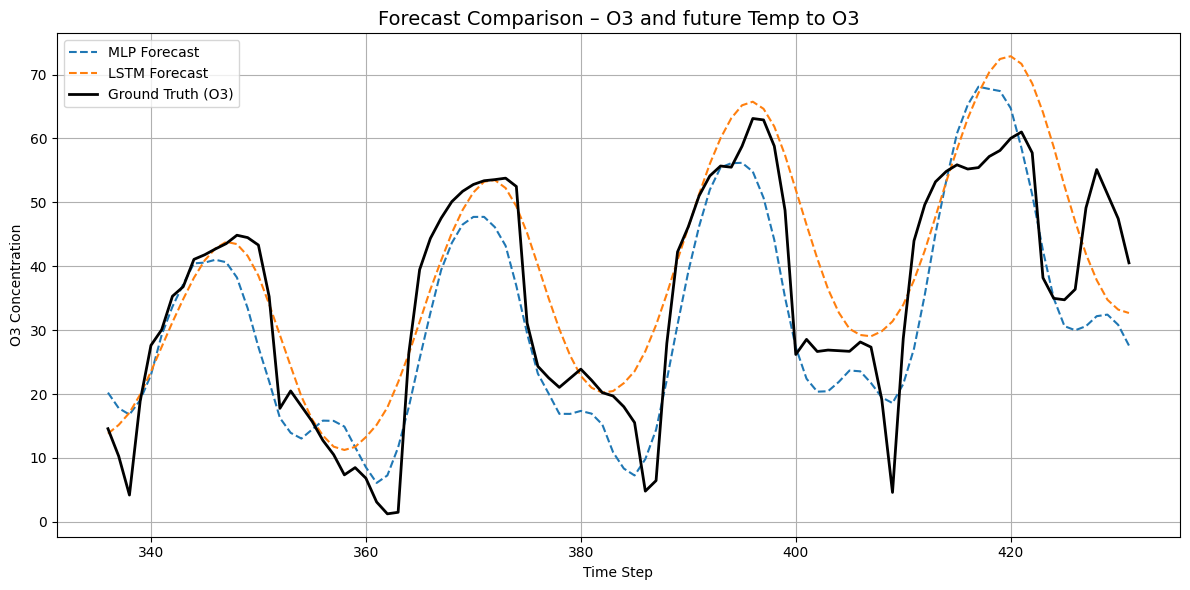

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
# thsi is the drive folder where all my results are (its public )
base_dir = "/content/drive/MyDrive/timeseries_datanew"

# here jsut first example from test set you can change from 1 to 100 (only made 100 sartima predictions)
example_idx = 0


# how much history the models saw, and how many future steps they predicted
context_window = 336
prediction_horizon = 96

# these are my forecast results for the different models and tasks (there si always an y_true for each which is the same of course)
forecast_groups = {
    "O3 to O3": {
        "SARIMA": ("sarima_forecasts/forecast_sarima_o3_on_o3.npy",
                   "sarima_forecasts/y_true_sarima_o3_on_o3.npy"),
        "MLP":    ("mlp_forecasts/forecast_mlp_o3_on_o3.npy",
                   "mlp_forecasts/y_true_mlp_o3_on_o3.npy"),
        "LSTM":   ("lstm_forecasts/forecast_lstm_o3_on_o3.npy",
                   "lstm_forecasts/y_true_lstm_o3_on_o3.npy")
    },
    "O3 and Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_temp.npy")
    },
    "O3 and future Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp_future.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp_future.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_future_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_future_temp.npy")
    }
}

# Different plot for each Variable combination
for group_name, models in forecast_groups.items():
    plt.figure(figsize=(12, 6))
    plt.title(f"Forecast Comparison – {group_name}", fontsize=14)

    ground_truth = None  # we will later use the y_true of the model in each group in the loop (doen´snt matter which we use since tehre all the same)
    # now we go though all the models
    for model_name, (forecast_path_rel, y_true_path_rel) in models.items():
        forecast_path = os.path.join(base_dir, forecast_path_rel) # load forecast
        y_true_path   = os.path.join(base_dir, y_true_path_rel) # load y true ()

        if not os.path.exists(forecast_path) or not os.path.exists(y_true_path):
            print(f"⚠️ File missing: {model_name}")
            continue

        forecast = np.load(forecast_path)
        y_true   = np.load(y_true_path)


        forecast = forecast[example_idx]



        # same for ground truth
        if ground_truth is None:
            if y_true.ndim == 3:
                ground_truth = y_true[example_idx, :, 0]
            elif y_true.ndim == 2:
                ground_truth = y_true[example_idx]

        # plot each forecast with a dashed line
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            forecast,
            label=f"{model_name} Forecast",
            linestyle="--"
        )

    # plot ground truth once per group
    if ground_truth is not None:
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            ground_truth,
            label="Ground Truth (O3)",
            color="black",
            linewidth=2
        )

    plt.xlabel("Time Step")
    plt.ylabel("O3 Concentration")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


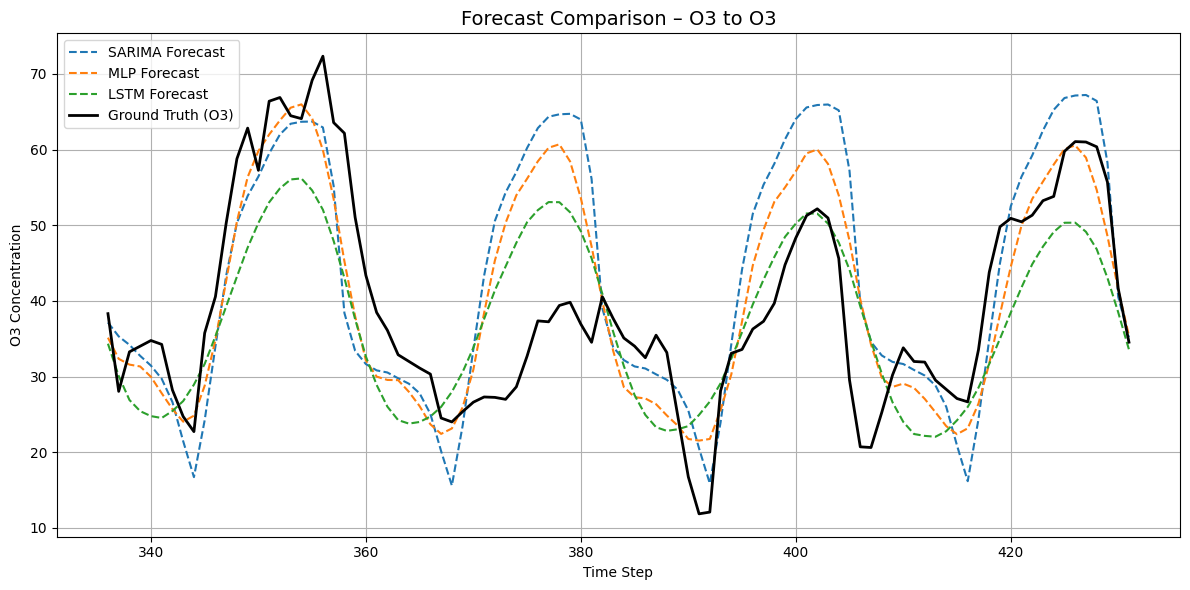

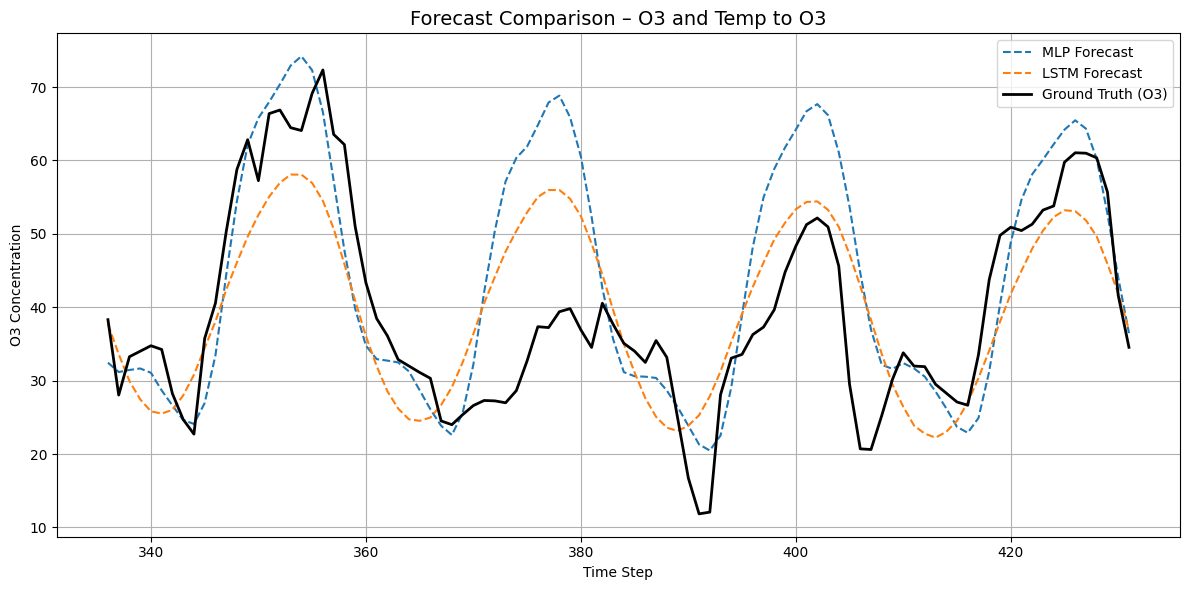

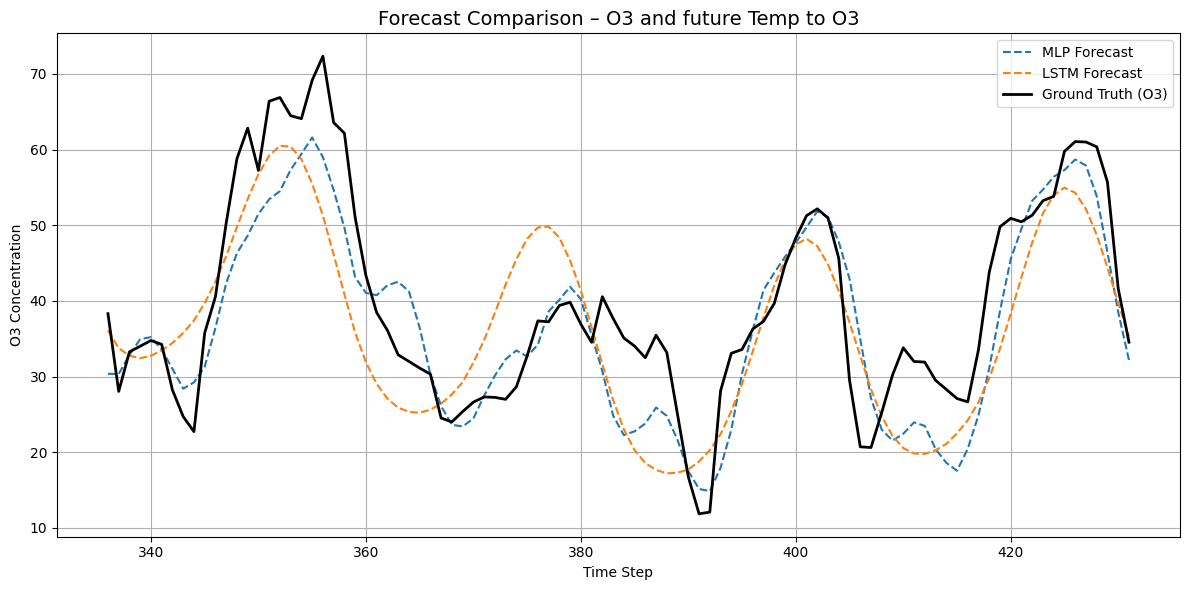

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
# thsi is the drive folder where all my results are (its public )
base_dir = "/content/drive/MyDrive/timeseries_datanew"

# here jsut first example from test set you can change from 1 to 100 (only made 100 sartima predictions)
example_idx = 50


# how much history the models saw, and how many future steps they predicted
context_window = 336
prediction_horizon = 96

# these are my forecast results for the different models and tasks (there si always an y_true for each which is the same of course)
forecast_groups = {
    "O3 to O3": {
        "SARIMA": ("sarima_forecasts/forecast_sarima_o3_on_o3.npy",
                   "sarima_forecasts/y_true_sarima_o3_on_o3.npy"),
        "MLP":    ("mlp_forecasts/forecast_mlp_o3_on_o3.npy",
                   "mlp_forecasts/y_true_mlp_o3_on_o3.npy"),
        "LSTM":   ("lstm_forecasts/forecast_lstm_o3_on_o3.npy",
                   "lstm_forecasts/y_true_lstm_o3_on_o3.npy")
    },
    "O3 and Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_temp.npy")
    },
    "O3 and future Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp_future.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp_future.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_future_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_future_temp.npy")
    }
}

# Different plot for each Variable combination
for group_name, models in forecast_groups.items():
    plt.figure(figsize=(12, 6))
    plt.title(f"Forecast Comparison – {group_name}", fontsize=14)

    ground_truth = None  # we will later use the y_true of the model in each group in the loop (doen´snt matter which we use since tehre all the same)
    # now we go though all the models
    for model_name, (forecast_path_rel, y_true_path_rel) in models.items():
        forecast_path = os.path.join(base_dir, forecast_path_rel) # load forecast
        y_true_path   = os.path.join(base_dir, y_true_path_rel) # load y true ()

        if not os.path.exists(forecast_path) or not os.path.exists(y_true_path):
            print(f"⚠️ File missing: {model_name}")
            continue

        forecast = np.load(forecast_path)
        y_true   = np.load(y_true_path)


        forecast = forecast[example_idx]



        # same for ground truth
        if ground_truth is None:
            if y_true.ndim == 3:
                ground_truth = y_true[example_idx, :, 0]
            elif y_true.ndim == 2:
                ground_truth = y_true[example_idx]

        # plot each forecast with a dashed line
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            forecast,
            label=f"{model_name} Forecast",
            linestyle="--"
        )

    # plot ground truth once per group
    if ground_truth is not None:
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            ground_truth,
            label="Ground Truth (O3)",
            color="black",
            linewidth=2
        )

    plt.xlabel("Time Step")
    plt.ylabel("O3 Concentration")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


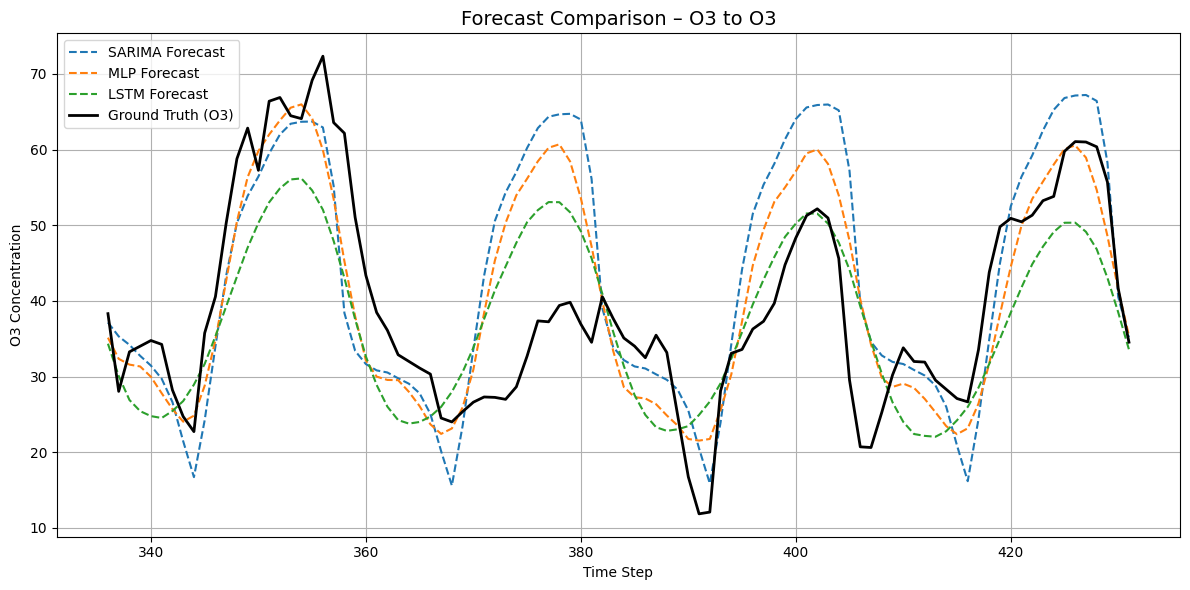

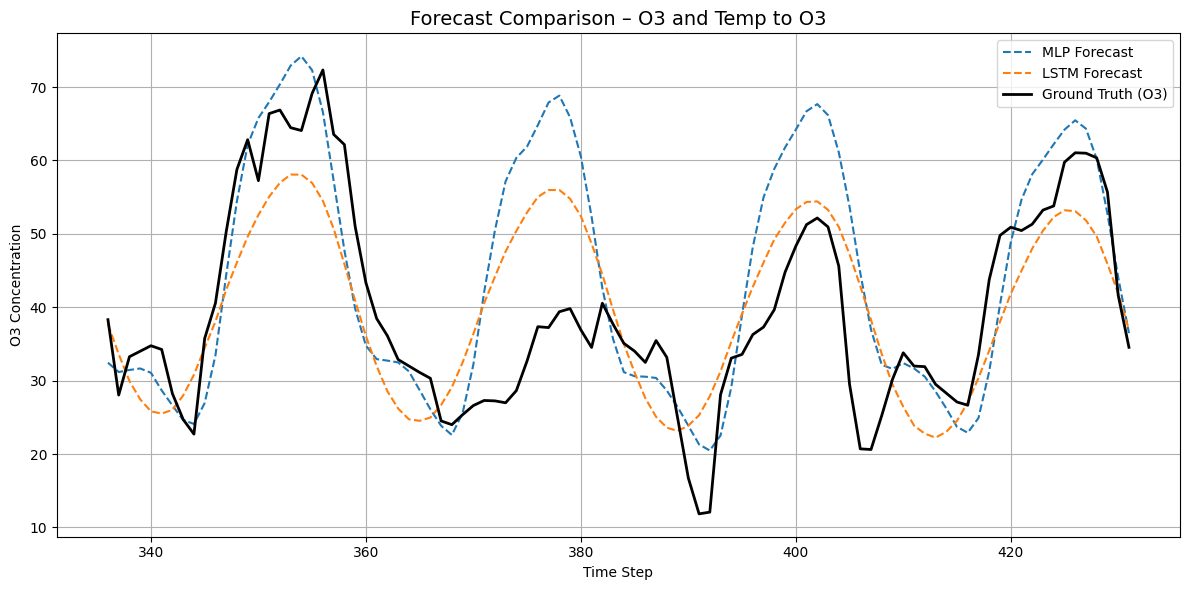

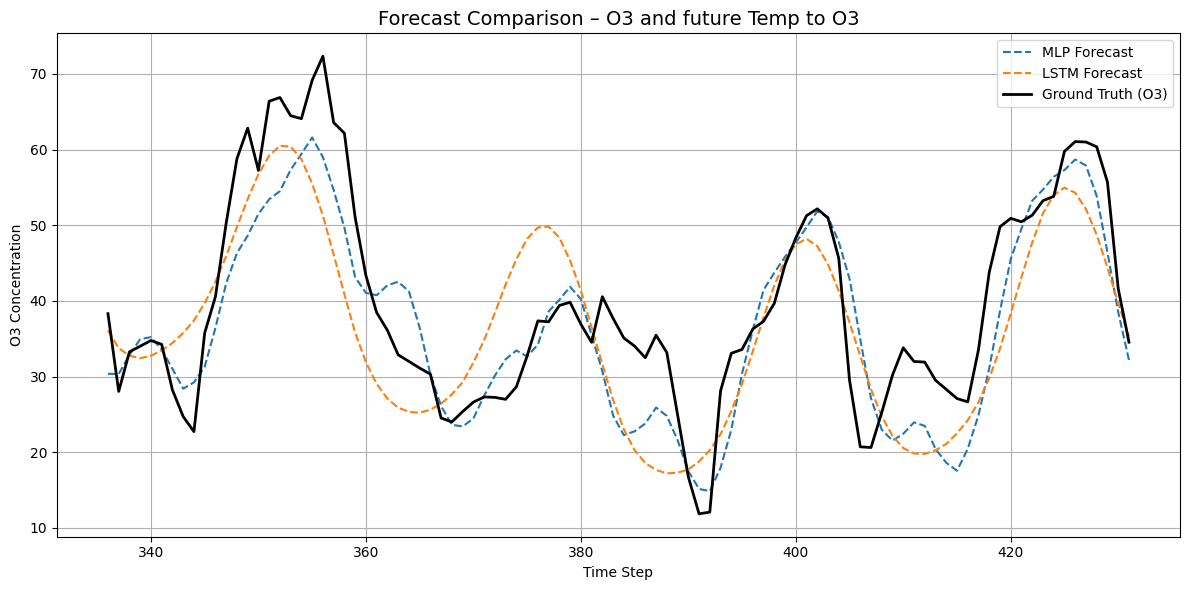

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
# thsi is the drive folder where all my results are (its public )
base_dir = "/content/drive/MyDrive/timeseries_datanew"

# here jsut first example from test set you can change from 1 to 100 (only made 100 sartima predictions)
example_idx = 50


# how much history the models saw, and how many future steps they predicted
context_window = 336
prediction_horizon = 96

# these are my forecast results for the different models and tasks (there si always an y_true for each which is the same of course)
forecast_groups = {
    "O3 to O3": {
        "SARIMA": ("sarima_forecasts/forecast_sarima_o3_on_o3.npy",
                   "sarima_forecasts/y_true_sarima_o3_on_o3.npy"),
        "MLP":    ("mlp_forecasts/forecast_mlp_o3_on_o3.npy",
                   "mlp_forecasts/y_true_mlp_o3_on_o3.npy"),
        "LSTM":   ("lstm_forecasts/forecast_lstm_o3_on_o3.npy",
                   "lstm_forecasts/y_true_lstm_o3_on_o3.npy")
    },
    "O3 and Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_temp.npy")
    },
    "O3 and future Temp to O3": {
        "MLP":  ("mlp_forecasts/forecast_mlp_o3_on_o3_temp_future.npy",
                 "mlp_forecasts/y_true_mlp_o3_on_o3_temp_future.npy"),
        "LSTM": ("lstm_forecasts/forecast_lstm_o3_on_o3_future_temp.npy",
                 "lstm_forecasts/y_true_lstm_o3_on_o3_future_temp.npy")
    }
}

# Different plot for each Variable combination
for group_name, models in forecast_groups.items():
    plt.figure(figsize=(12, 6))
    plt.title(f"Forecast Comparison – {group_name}", fontsize=14)

    ground_truth = None  # we will later use the y_true of the model in each group in the loop (doen´snt matter which we use since tehre all the same)
    # now we go though all the models
    for model_name, (forecast_path_rel, y_true_path_rel) in models.items():
        forecast_path = os.path.join(base_dir, forecast_path_rel) # load forecast
        y_true_path   = os.path.join(base_dir, y_true_path_rel) # load y true ()

        if not os.path.exists(forecast_path) or not os.path.exists(y_true_path):
            print(f"⚠️ File missing: {model_name}")
            continue

        forecast = np.load(forecast_path)
        y_true   = np.load(y_true_path)


        forecast = forecast[example_idx]



        # same for ground truth
        if ground_truth is None:
            if y_true.ndim == 3:
                ground_truth = y_true[example_idx, :, 0]
            elif y_true.ndim == 2:
                ground_truth = y_true[example_idx]

        # plot each forecast with a dashed line
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            forecast,
            label=f"{model_name} Forecast",
            linestyle="--"
        )

    # plot ground truth once per group
    if ground_truth is not None:
        plt.plot(
            range(context_window, context_window + prediction_horizon),
            ground_truth,
            label="Ground Truth (O3)",
            color="black",
            linewidth=2
        )

    plt.xlabel("Time Step")
    plt.ylabel("O3 Concentration")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
